# TrustLabsExercise

The goal of this analysis is for policy makers to have a better understanding of how accessible healthcare centers are through the SFMTA. In terms of accessibility and public health it is very important for cities to be concious of how citizens can use public transportation to access healthcare facilities. It's likely that we would see negative public health indicators such as number of missed appointments, communite time to healthcare, and likelihood to see a healthcare provider worsen for communities that rely on public transportation if cities are not buidling transit near healthcare centers. 

In [206]:
# import packages
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, MultiPoint
import matplotlib.pyplot as plt
import contextily as ctx

## Reading in Data

Using data from the SF Open Data portal to import information about transit stops, healthcare centers, and neighhorhood boundaries. Made sure that the geospatail data was on the same projection. Making initial maps to visualize the density of these stops in certain areas.

In [207]:
stop_data = gpd.read_file('TrustDataStops.csv')
stop_data.head()

stop_id stop_code                    stop_name   stop_lat     stop_lon  \
0     390     10390    19th Avenue & Holloway St   37.72119  -122.475096   
1     913     10913    Dublin St & La Grande Ave  37.719192  -122.425802   
2    3016     13016            3rd St & 4th St    37.772618  -122.389786   
3    3018     13018  Bacon St & San Bruno Ave     37.727739   -122.40324   
4    3019     13019   Bacon St & San Bruno Ave    37.727645  -122.403269   

  geometry  
0     None  
1     None  
2     None  
3     None  
4     None

In [208]:
stop_data['stop_lat'] = stop_data['stop_lat'].astype(float)
stop_data['stop_lon'] = stop_data['stop_lon'].astype(float)
stop_data['stop_id'] = stop_data['stop_id'].astype(int)
stop_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   stop_id    3143 non-null   int64   
 1   stop_code  3143 non-null   object  
 2   stop_name  3143 non-null   object  
 3   stop_lat   3143 non-null   float64 
 4   stop_lon   3143 non-null   float64 
 5   geometry   0 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 147.5+ KB


In [209]:
stop_data['geometry'] = [Point(xy) for xy in zip(stop_data.stop_lon, stop_data.stop_lat)]

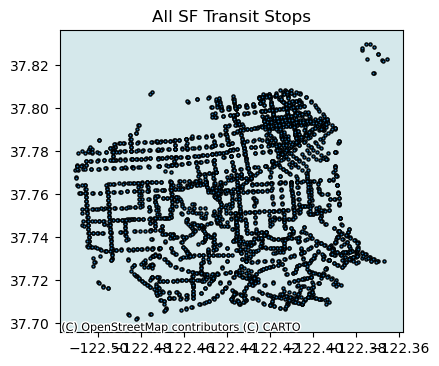

In [210]:
f, ax = plt.subplots(dpi=100)
stop_data.plot(ax=ax, markersize=5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=stop_data.crs, source=ctx.providers.CartoDB.Voyager, zoom=15)
ax.set_title('All SF Transit Stops');

In [211]:
hc_data = gpd.read_file('geo_export_0b8e5056-3792-455e-81fa-4fea81649374.shp')
hc_data.crs
hc_data = hc_data.to_crs('epsg:4326')

In [212]:
hc_data.head()

uid   oshpd_id                                         facility_n  \
0   3  106380929          California Pacific Med Ctr-pacific Campus   
1  39  306384014                      On Lok Senior Health Services   
2  25  306384158                                 Institute On Aging   
3  20  306381276  Drug Detoxification, Rehab And After Care Svs....   
4  54  306384220              Woman's Community Clinic/tides Center   

                    facility_t        services              location_a  \
0  General Acute Care Hospital        Hospital    2333 BUCHANAN STREET   
1             Community Clinic   Senior Health  1000 MONTGOMERY STREET   
2             Community Clinic   Senior Health        2700 GEARY BLVD.   
3                  Free Clinic  Drug Treatment      529 CLAYTON STREET   
4             Community Clinic   Womens Health    1833 FILLMORE STREET   

      location_c location_s location_z                     geometry  
0  San Francisco         CA       None  POINT (-122.43104 37.79142)  
1  San Francisco         CA       None  POINT (-122.40386 37.79847)  
2  San Francisco         CA       None  POINT (-122.44834 37.78247)  
3  San Francisco         CA       None  POINT (-122.44870 37.77029)  
4  San Francisco         CA       None  POINT (-122.43338 37.78652)

In [213]:
hc_data.shape

(78, 10)

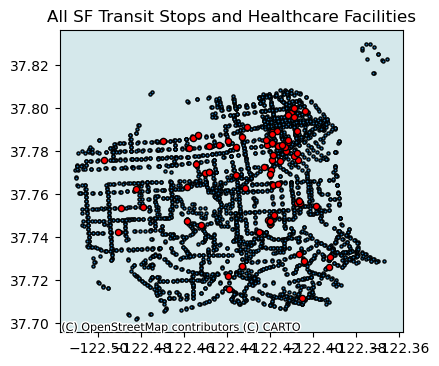

In [214]:
f, ax = plt.subplots(dpi=100)
stop_data.plot(ax=ax, markersize=5, edgecolor='k')
hc_data.plot(ax=ax, markersize=20, edgecolor='k',c = 'red')
ctx.add_basemap(ax=ax, crs=stop_data.crs, source=ctx.providers.CartoDB.Voyager, zoom=15)
ax.set_title('All SF Transit Stops and Healthcare Facilities');

In [215]:
n_data = gpd.read_file('NHoods/geo_export_fa504c5c-134d-40a3-a83b-cb9e67d807b0.shp')
n_data.head()
n_data = n_data.to_crs('epsg:4326')

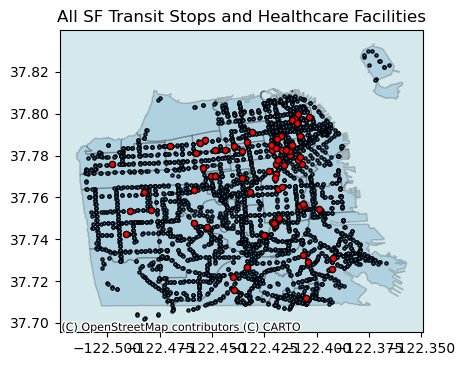

In [216]:
f, ax = plt.subplots(dpi=100)
n_data.plot(ax=ax,edgecolor='k',alpha=.2)
stop_data.plot(ax=ax, markersize=5, edgecolor='k')
hc_data.plot(ax=ax, markersize=20, edgecolor='k',c = 'red')
ctx.add_basemap(ax=ax, crs=stop_data.crs, source=ctx.providers.CartoDB.Voyager, zoom=15)
ax.set_title('All SF Transit Stops and Healthcare Facilities');

## Start of Analysis

### Attaching Neighborhood Data to Transit Stops with Spacial Join

In [217]:
stop_data = stop_data.set_crs('epsg:4326')
n_data = n_data.to_crs('epsg:4326')
hc_data = hc_data.to_crs('epsg:4326')

In [218]:
stop_n_comb = stop_data.sjoin(n_data)

In [219]:
stop_n_comb.head()

stop_id stop_code                        stop_name   stop_lat  \
0        390     10390        19th Avenue & Holloway St  37.721190   
222     3352     13352      19th Ave & Buckingham Way    37.725732   
225     3356     13356        19th Ave & Holloway Ave    37.721110   
227     3358     13358        19th Ave & Holloway Ave    37.721342   
232     3363     13363  19th Ave & Junipero Serra Blvd   37.717323   

       stop_lon                     geometry  index_right      nhood  
0   -122.475096  POINT (-122.47510 37.72119)           15  Lakeshore  
222 -122.475063  POINT (-122.47506 37.72573)           15  Lakeshore  
225 -122.475302  POINT (-122.47530 37.72111)           15  Lakeshore  
227 -122.475245  POINT (-122.47525 37.72134)           15  Lakeshore  
232 -122.472970  POINT (-122.47297 37.71732)           15  Lakeshore

In [220]:
stop_n_comb.shape

(3120, 8)

In [221]:
num_stops = stop_n_comb.groupby(by='nhood').agg(func=['count'])

In [222]:
num_stops = num_stops['stop_id']

In [223]:
num_stops.head()

count
nhood                       
Bayview Hunters Point    258
Bernal Heights            96
Castro/Upper Market      124
Chinatown                 50
Excelsior                118

### Graphing Descriptive Statistics

<AxesSubplot:xlabel='nhood'>

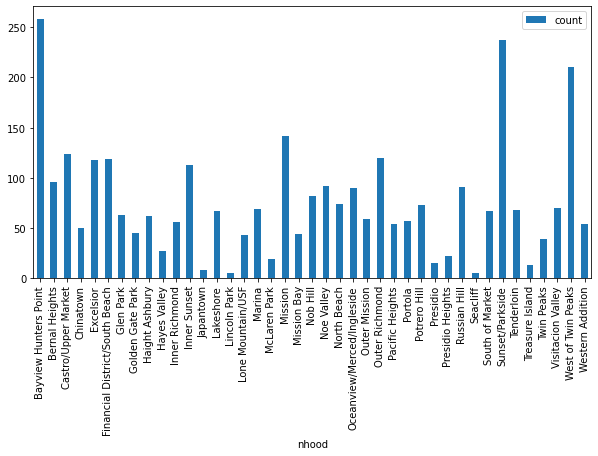

In [224]:
num_stops.plot.bar(y='count',figsize=(10,5))

The neighborhoods of Bayview Hunters Point, Sunset/Parkside, and West of Twin Peaks have the most number of transit stops. 

### Attaching Neighborhood Data to Healthcare Center Data with Spacial Join

In [225]:
hc_n_comb = hc_data.sjoin(n_data)
hc_n_comb.head()

uid   oshpd_id                                 facility_n  \
0    3  106380929  California Pacific Med Ctr-pacific Campus   
4   54  306384220      Woman's Community Clinic/tides Center   
1   39  306384014              On Lok Senior Health Services   
27  35  306382711                North East Medical Services   
2   25  306384158                         Institute On Aging   

                     facility_t                 services  \
0   General Acute Care Hospital                 Hospital   
4              Community Clinic            Womens Health   
1              Community Clinic            Senior Health   
27             Community Clinic  Cultural General Health   
2              Community Clinic            Senior Health   

                location_a     location_c location_s location_z  \
0     2333 BUCHANAN STREET  San Francisco         CA       None   
4     1833 FILLMORE STREET  San Francisco         CA       None   
1   1000 MONTGOMERY STREET  San Francisco         CA       None   
27    1520 STOCKTON STREET  San Francisco         CA       None   
2         2700 GEARY BLVD.  San Francisco         CA       None   

                       geometry  index_right             nhood  
0   POINT (-122.43104 37.79142)           31   Pacific Heights  
4   POINT (-122.43338 37.78652)           31   Pacific Heights  
1   POINT (-122.40386 37.79847)           25       North Beach  
27  POINT (-122.40903 37.79990)           25       North Beach  
2   POINT (-122.44834 37.78247)           35  Presidio Heights

In [226]:
num_hc = hc_n_comb.groupby(by='nhood').agg(func=['count'])['uid']

In [227]:
num_hc

count
nhood                                
Bayview Hunters Point               2
Bernal Heights                      6
Castro/Upper Market                 2
Chinatown                           3
Excelsior                           1
Financial District/South Beach      1
Glen Park                           1
Haight Ashbury                      3
Inner Richmond                      1
Inner Sunset                        1
Japantown                           1
Lone Mountain/USF                   3
Mission                            12
Nob Hill                            3
North Beach                         2
Outer Mission                       3
Outer Richmond                      1
Pacific Heights                     2
Portola                             2
Potrero Hill                        1
Presidio Heights                    3
South of Market                     5
Sunset/Parkside                     4
Tenderloin                          9
Twin Peaks                          1
Visitacion Valley                   1
West of Twin Peaks                  1
Western Addition                    3

<AxesSubplot:xlabel='nhood'>

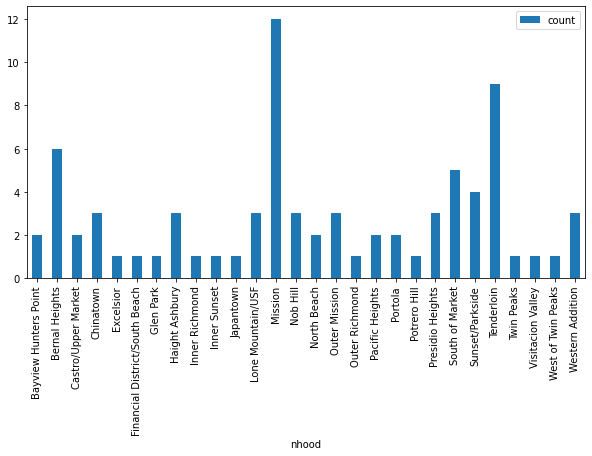

In [228]:
num_hc.plot.bar(y='count',figsize=(10,5))

The neighborhoods of Bernal Heights, Mission, and the Tenderloin have the most number of healthcare facilities.

## Evaluation

To perform this analysis we're going to need metrics of public transport access. Ideally, we would have more robust metrics such as number of routes accessible from healthcare centers, average trip times to healthcare centers, frequency of routes near healthcare centers.

Two measures for public transportation are frequency and number of routes available. For the purposes of this evaluation, a frequency metric will be calculated by the number of times a stop appears in the stop time dataset. In addition, number of routes serviced will be evaluated by counting the number of stops within a 500m radius of each healthcare center. 

## Frequency Metrics

In [229]:
freq = pd.read_csv('stop_times.csv')

In [230]:
freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958181 entries, 0 to 958180
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   trip_id              958181 non-null  int64 
 1   arrival_time         958181 non-null  object
 2   departure_time       958181 non-null  object
 3   stop_id              958181 non-null  int64 
 4   stop_sequence        958181 non-null  int64 
 5   stop_headsign        958181 non-null  object
 6   pickup_type          958181 non-null  object
 7   drop_off_type        958181 non-null  object
 8   shape_dist_traveled  958181 non-null  object
dtypes: int64(3), object(6)
memory usage: 65.8+ MB


In [231]:
freq_stops = freq.groupby(by='stop_id').agg(func=['count'])['trip_id']
freq_stops.describe()

count
count  3143.000000
mean    304.861915
std     218.821674
min       1.000000
25%     156.000000
50%     249.000000
75%     383.000000
max    1666.000000

In [232]:
freq_stops.reset_index()

stop_id  count
0         390    507
1         913    210
2        3016     78
3        3018    141
4        3019    144
...       ...    ...
3138     8076    150
3139     8077    150
3140     8078    112
3141     8080      1
3142     8081    285

[3143 rows x 2 columns]

In [233]:
stop_data = stop_data.merge(freq_stops,on='stop_id')
stop_data.head()

stop_id stop_code                    stop_name   stop_lat    stop_lon  \
0      390     10390    19th Avenue & Holloway St  37.721190 -122.475096   
1      913     10913    Dublin St & La Grande Ave  37.719192 -122.425802   
2     3016     13016            3rd St & 4th St    37.772618 -122.389786   
3     3018     13018  Bacon St & San Bruno Ave     37.727739 -122.403240   
4     3019     13019   Bacon St & San Bruno Ave    37.727645 -122.403269   

                      geometry  count  
0  POINT (-122.47510 37.72119)    507  
1  POINT (-122.42580 37.71919)    210  
2  POINT (-122.38979 37.77262)     78  
3  POINT (-122.40324 37.72774)    141  
4  POINT (-122.40327 37.72765)    144

In [234]:
stop_data_gdf = gpd.GeoDataFrame(stop_data, geometry = [Point(xy) for xy in zip(stop_data.stop_lon, stop_data.stop_lat)])

In [235]:
stop_data_gdf.head()

stop_id stop_code                    stop_name   stop_lat    stop_lon  \
0      390     10390    19th Avenue & Holloway St  37.721190 -122.475096   
1      913     10913    Dublin St & La Grande Ave  37.719192 -122.425802   
2     3016     13016            3rd St & 4th St    37.772618 -122.389786   
3     3018     13018  Bacon St & San Bruno Ave     37.727739 -122.403240   
4     3019     13019   Bacon St & San Bruno Ave    37.727645 -122.403269   

                      geometry  count  
0  POINT (-122.47510 37.72119)    507  
1  POINT (-122.42580 37.71919)    210  
2  POINT (-122.38979 37.77262)     78  
3  POINT (-122.40324 37.72774)    141  
4  POINT (-122.40327 37.72765)    144

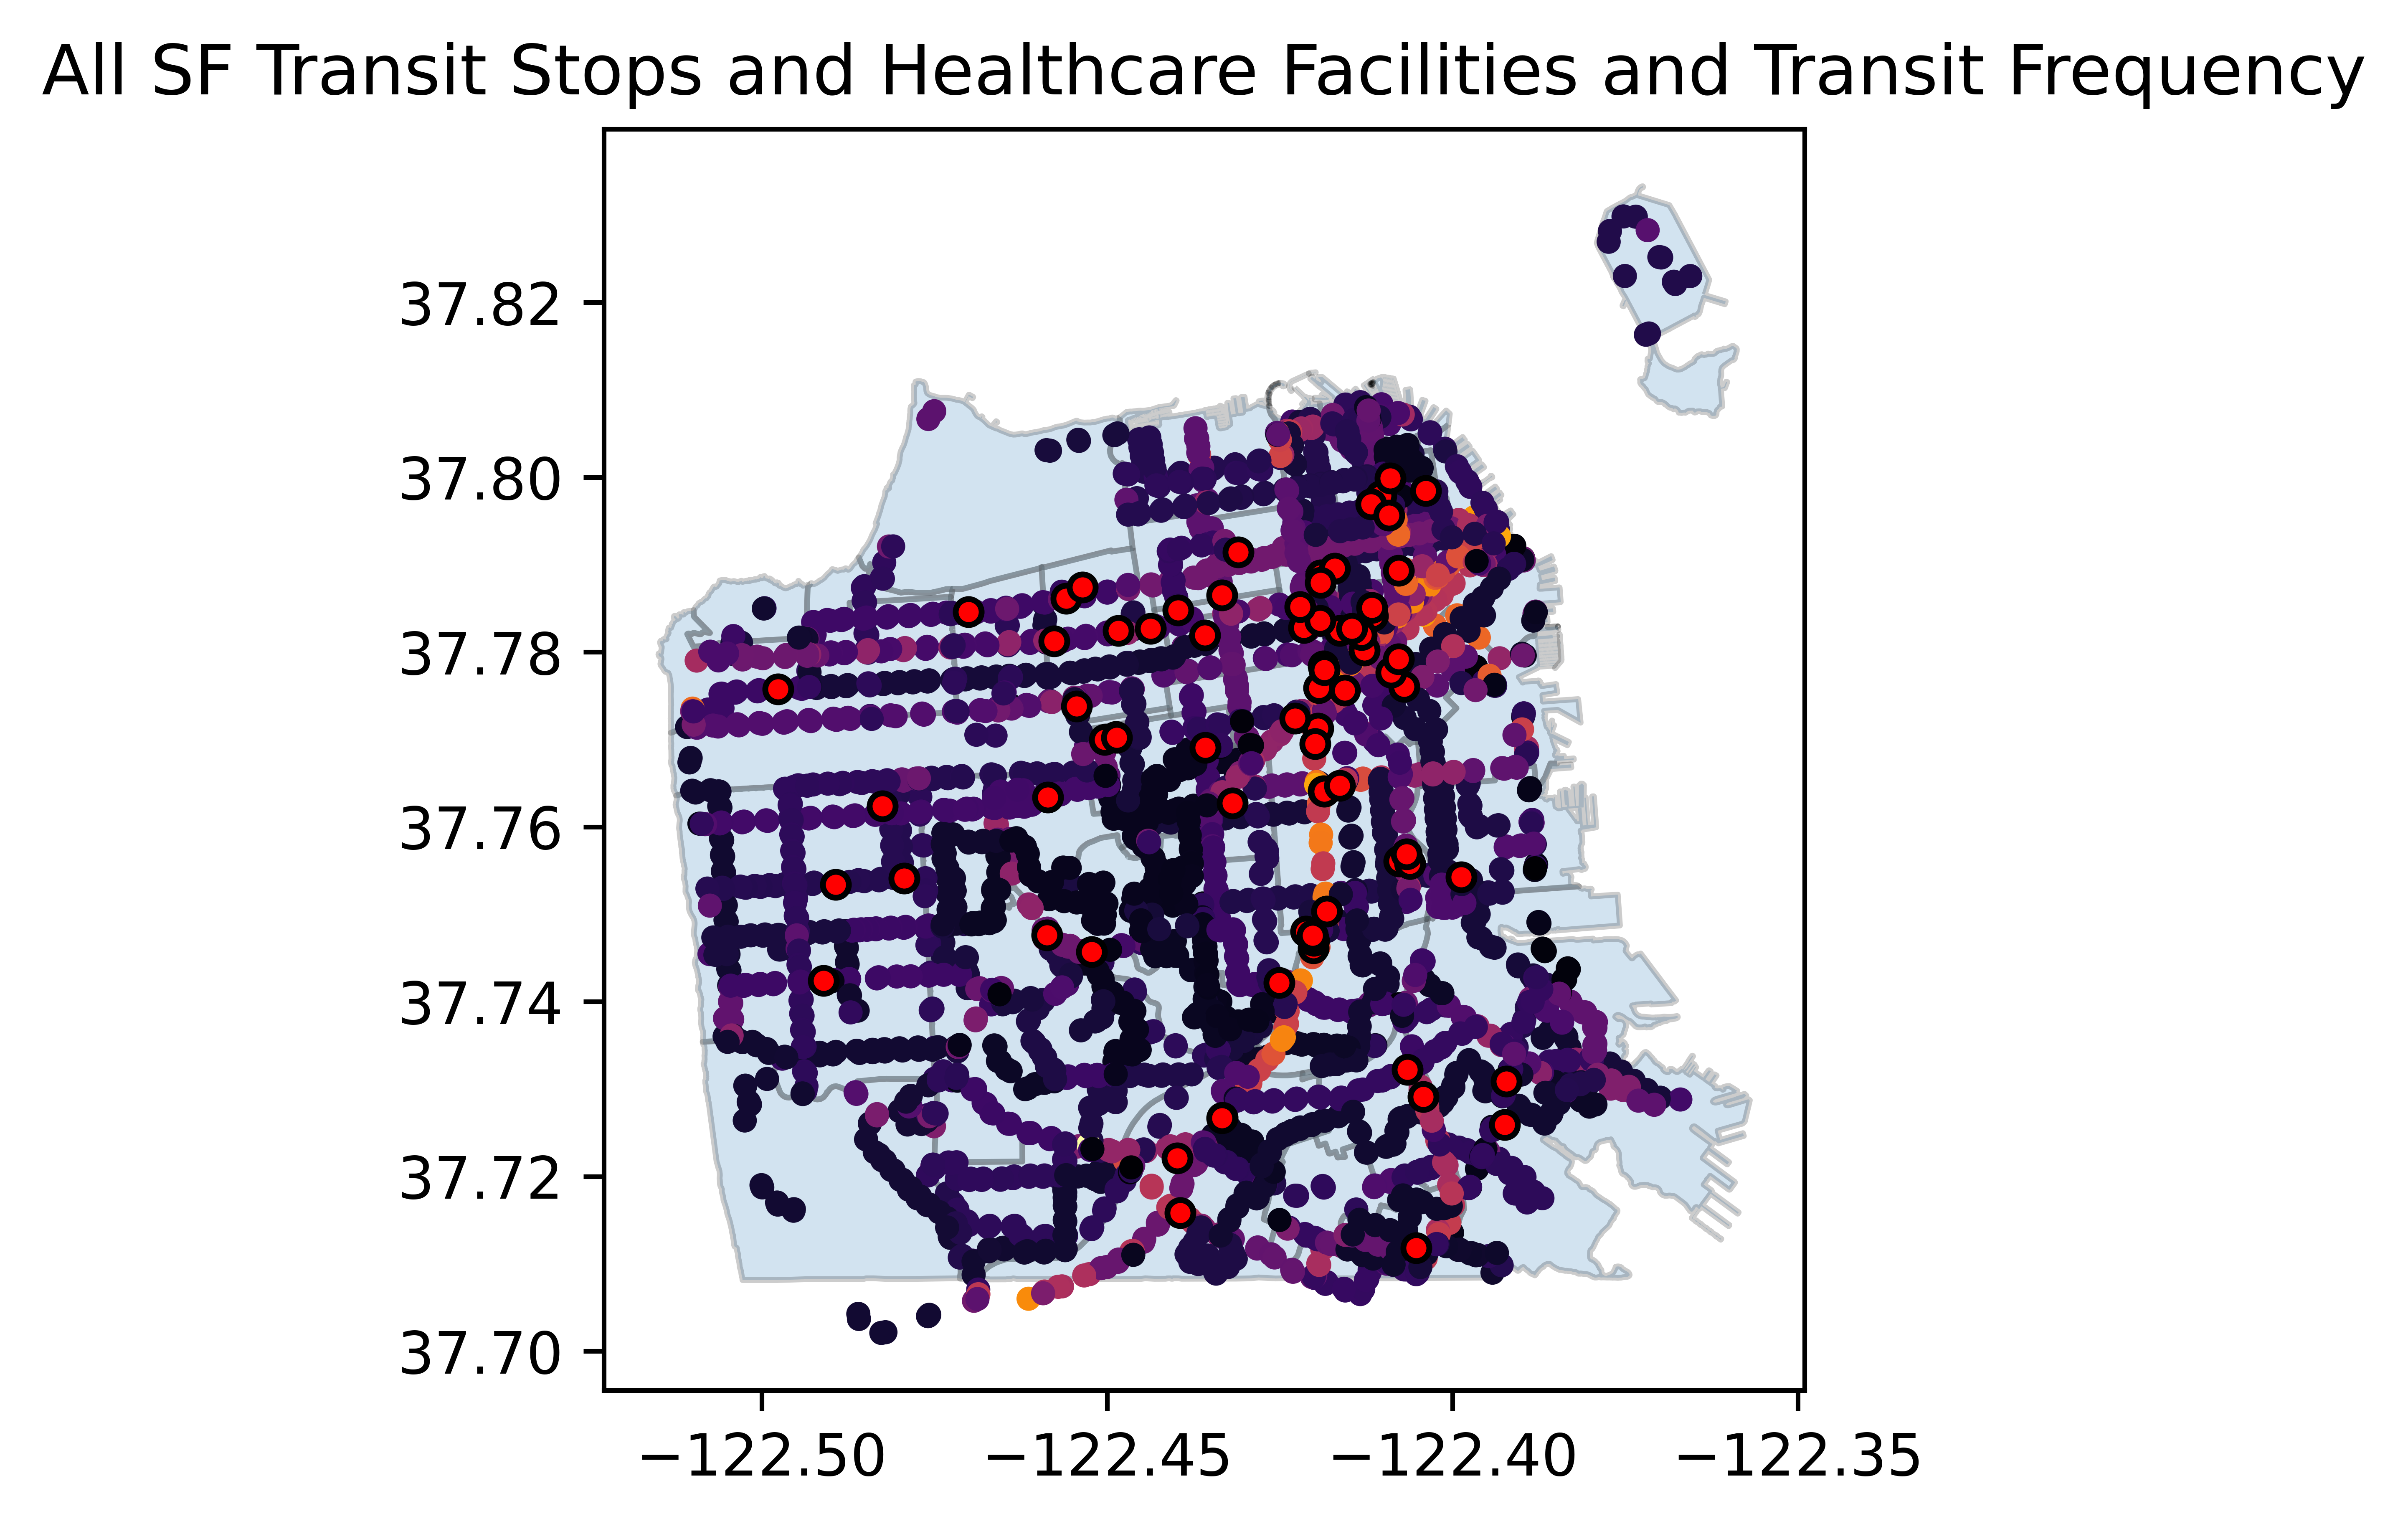

In [172]:
f, ax = plt.subplots(dpi=1000)
n_data.plot(ax=ax,edgecolor='k',alpha=.2)
stop_data_gdf.plot(ax=ax, column='count', markersize=10,cmap='inferno')
hc_data.plot(ax=ax, markersize=20, edgecolor='k', c = 'red')
#ctx.add_basemap(ax=ax, crs=stop_data.crs, source=ctx.providers.CartoDB.Voyager, zoom=15)
ax.set_title('All SF Transit Stops and Healthcare Facilities and Transit Frequency');

In the northeast of the city we see a high density of frequent transportation around healthcare centers represented by the orange area. There is also a branch of frequent transit emerging from the northeast due southwest with healthcare centers along the corridor. However, in the center west of SF, we see healthcare centers that are not sorrounded by frequent transit. This could present an opptunity to increase frequency of transit to those locations.

## Density Metrics

uid   oshpd_id                                         facility_n  \
0   3  106380929          California Pacific Med Ctr-pacific Campus   
1  39  306384014                      On Lok Senior Health Services   
2  25  306384158                                 Institute On Aging   
3  20  306381276  Drug Detoxification, Rehab And After Care Svs....   
4  54  306384220              Woman's Community Clinic/tides Center   

                    facility_t        services              location_a  \
0  General Acute Care Hospital        Hospital    2333 BUCHANAN STREET   
1             Community Clinic   Senior Health  1000 MONTGOMERY STREET   
2             Community Clinic   Senior Health        2700 GEARY BLVD.   
3                  Free Clinic  Drug Treatment      529 CLAYTON STREET   
4             Community Clinic   Womens Health    1833 FILLMORE STREET   

      location_c location_s location_z                     geometry  \
0  San Francisco         CA       None  POINT (-122.43104 37.79142)   
1  San Francisco         CA       None  POINT (-122.40386 37.79847)   
2  San Francisco         CA       None  POINT (-122.44834 37.78247)   
3  San Francisco         CA       None  POINT (-122.44870 37.77029)   
4  San Francisco         CA       None  POINT (-122.43338 37.78652)   

                                         Walk_Radius  
0  POLYGON ((377.56896 37.79142, 375.16133 -11.21...  
1  POLYGON ((377.59614 37.79847, 375.18851 -11.21...  
2  POLYGON ((377.55166 37.78247, 375.14402 -11.22...  
3  POLYGON ((377.55130 37.77029, 375.14366 -11.23...  
4  POLYGON ((377.56662 37.78652, 375.15898 -11.22...

In [236]:
hc_data = hc_data.to_crs('epsg:32610')
hc_data['Walk_Radius'] = hc_data['geometry'].buffer(500)
hc_data['og_point'] = hc_data['geometry']
hc_data['geometry'] = hc_data['Walk_Radius']
hc_data.head()

uid   oshpd_id                                         facility_n  \
0   3  106380929          California Pacific Med Ctr-pacific Campus   
1  39  306384014                      On Lok Senior Health Services   
2  25  306384158                                 Institute On Aging   
3  20  306381276  Drug Detoxification, Rehab And After Care Svs....   
4  54  306384220              Woman's Community Clinic/tides Center   

                    facility_t        services              location_a  \
0  General Acute Care Hospital        Hospital    2333 BUCHANAN STREET   
1             Community Clinic   Senior Health  1000 MONTGOMERY STREET   
2             Community Clinic   Senior Health        2700 GEARY BLVD.   
3                  Free Clinic  Drug Treatment      529 CLAYTON STREET   
4             Community Clinic   Womens Health    1833 FILLMORE STREET   

      location_c location_s location_z  \
0  San Francisco         CA       None   
1  San Francisco         CA       None   
2  San Francisco         CA       None   
3  San Francisco         CA       None   
4  San Francisco         CA       None   

                                            geometry  \
0  POLYGON ((550594.740 4182825.959, 550592.332 4...   
1  POLYGON ((552983.004 4183622.271, 552980.597 4...   
2  POLYGON ((549076.902 4181823.096, 549074.494 4...   
3  POLYGON ((549053.177 4180472.303, 549050.770 4...   
4  POLYGON ((550391.518 4182281.048, 550389.110 4...   

                                         Walk_Radius  \
0  POLYGON ((550594.740 4182825.959, 550592.332 4...   
1  POLYGON ((552983.004 4183622.271, 552980.597 4...   
2  POLYGON ((549076.902 4181823.096, 549074.494 4...   
3  POLYGON ((549053.177 4180472.303, 549050.770 4...   
4  POLYGON ((550391.518 4182281.048, 550389.110 4...   

                         og_point  
0  POINT (550094.740 4182825.959)  
1  POINT (552483.004 4183622.271)  
2  POINT (548576.902 4181823.096)  
3  POINT (548553.177 4180472.303)  
4  POINT (549891.518 4182281.048)

In [184]:
stop_data_prj = stop_data.to_crs('epsg:32610')
stop_data_prj.head()

stop_id stop_code                    stop_name   stop_lat    stop_lon  \
0      390     10390    19th Avenue & Holloway St  37.721190 -122.475096   
1      913     10913    Dublin St & La Grande Ave  37.719192 -122.425802   
2     3016     13016            3rd St & 4th St    37.772618 -122.389786   
3     3018     13018  Bacon St & San Bruno Ave     37.727739 -122.403240   
4     3019     13019   Bacon St & San Bruno Ave    37.727645 -122.403269   

                         geometry  count_x  count_y  count  
0  POINT (546259.264 4175010.851)      507      507    507  
1  POINT (550604.889 4174814.670)      210      210    210  
2  POINT (553740.413 4180762.297)       78       78     78  
3  POINT (552587.285 4175775.378)      141      141    141  
4  POINT (552584.796 4175764.932)      144      144    144

In [193]:
walk_stops = hc_data.sjoin(stop_data_prj,predicate = 'contains')

In [200]:
walk_stops_stat = walk_stops.groupby(by='facility_n').agg(func=['count'])['stop_id']
walk_stops_stat.head()

count
facility_n                                     
3rd Street Youth Center & Clinic            116
Adult Immunization & Travel Clinic          125
Ahf Healthcare Center - San Francisco       135
Asian & Pacific Islander Wellness Center    149
Baart Market Clinic                         156

<AxesSubplot:xlabel='facility_n'>

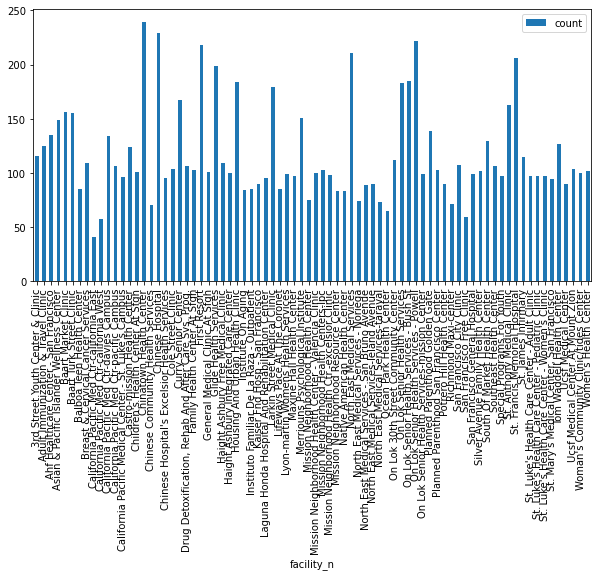

In [201]:
walk_stops_stat.plot.bar(y='count',figsize=(10,5))

In [237]:
hc_data_merge = hc_data.merge(walk_stops_stat,on='facility_n')

In [238]:
hc_data_merge['geometry'] = hc_data_merge['og_point']
hc_data_merge.head()

uid   oshpd_id                                         facility_n  \
0   3  106380929          California Pacific Med Ctr-pacific Campus   
1  39  306384014                      On Lok Senior Health Services   
2  25  306384158                                 Institute On Aging   
3  20  306381276  Drug Detoxification, Rehab And After Care Svs....   
4  54  306384220              Woman's Community Clinic/tides Center   

                    facility_t        services              location_a  \
0  General Acute Care Hospital        Hospital    2333 BUCHANAN STREET   
1             Community Clinic   Senior Health  1000 MONTGOMERY STREET   
2             Community Clinic   Senior Health        2700 GEARY BLVD.   
3                  Free Clinic  Drug Treatment      529 CLAYTON STREET   
4             Community Clinic   Womens Health    1833 FILLMORE STREET   

      location_c location_s location_z                        geometry  \
0  San Francisco         CA       None  POINT (550094.740 4182825.959)   
1  San Francisco         CA       None  POINT (552483.004 4183622.271)   
2  San Francisco         CA       None  POINT (548576.902 4181823.096)   
3  San Francisco         CA       None  POINT (548553.177 4180472.303)   
4  San Francisco         CA       None  POINT (549891.518 4182281.048)   

                                         Walk_Radius  \
0  POLYGON ((550594.740 4182825.959, 550592.332 4...   
1  POLYGON ((552983.004 4183622.271, 552980.597 4...   
2  POLYGON ((549076.902 4181823.096, 549074.494 4...   
3  POLYGON ((549053.177 4180472.303, 549050.770 4...   
4  POLYGON ((550391.518 4182281.048, 550389.110 4...   

                         og_point  count  
0  POINT (550094.740 4182825.959)    106  
1  POINT (552483.004 4183622.271)    183  
2  POINT (548576.902 4181823.096)     84  
3  POINT (548553.177 4180472.303)    106  
4  POINT (549891.518 4182281.048)    100

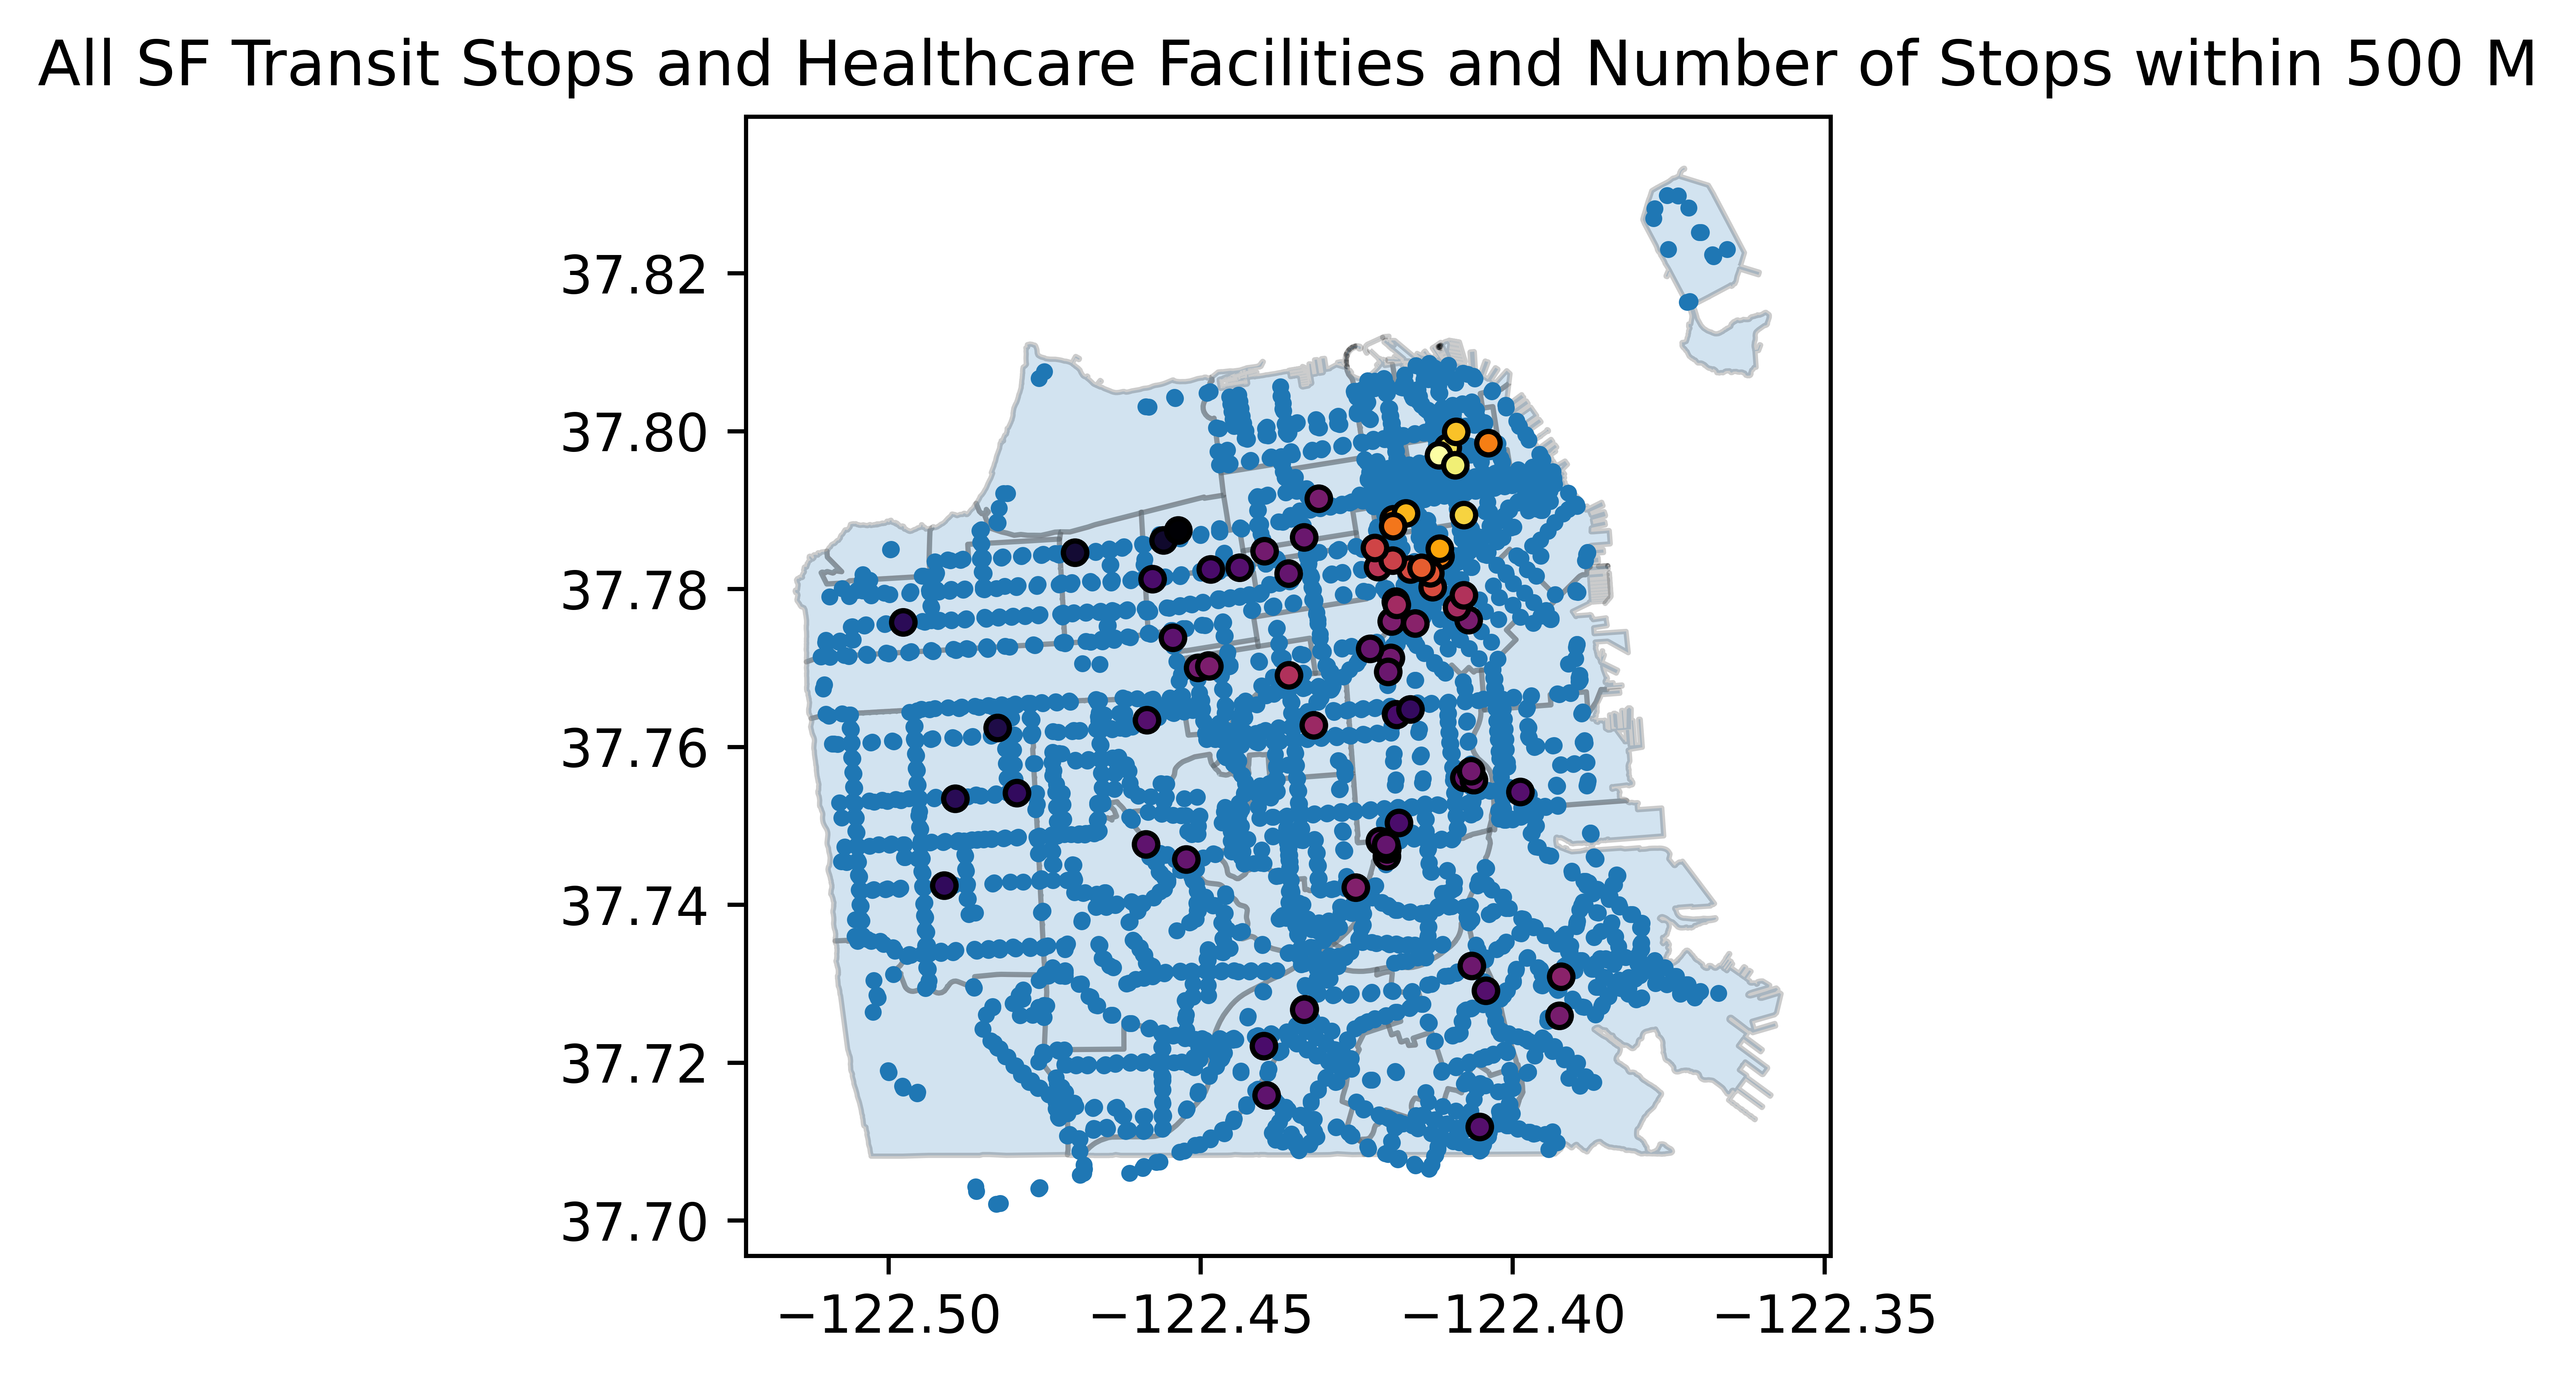

In [242]:
f, ax = plt.subplots(dpi=1000)
n_data.plot(ax=ax,edgecolor='k',alpha=.2)
stop_data_gdf.plot(ax=ax, markersize=5)
hc_data_merge.to_crs('epsg:4326').plot(ax=ax, column = 'count', markersize=20, edgecolor='k', cmap = 'inferno')
#ctx.add_basemap(ax=ax, crs=stop_data.crs, source=ctx.providers.CartoDB.Voyager, zoom=15)
ax.set_title('All SF Transit Stops and Healthcare Facilities and Number of Stops within 500 M');

Given this map of number of transit stops within a 500 meter radius of the healthcare center, we can see similar results to the map of frequent transit. The northeast of SF has dense transit while the west does not as much. The corridor of healthcare centers heading south from the northeast does not have a large number of stops nearby while the routes that are nearby are serviced frequently.

## Conclusion

I think that San Francisco should make sure that they're developing "healthcare centers" such as the one that exists in the northeast. There citizens can have frequent and diverse transit. The centers make it possible to only need to take one route and not change over.